# K-Means and VQ
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Means clustering** algorithm
- play with the hyperparameter K 
- implement the Vector Quantization with K-Means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

Run your k-means algorithm on `kmeans_data.mat`. Note that the lines indicate the iterations of centroids.

908.1713254614064 1457.1476417203792


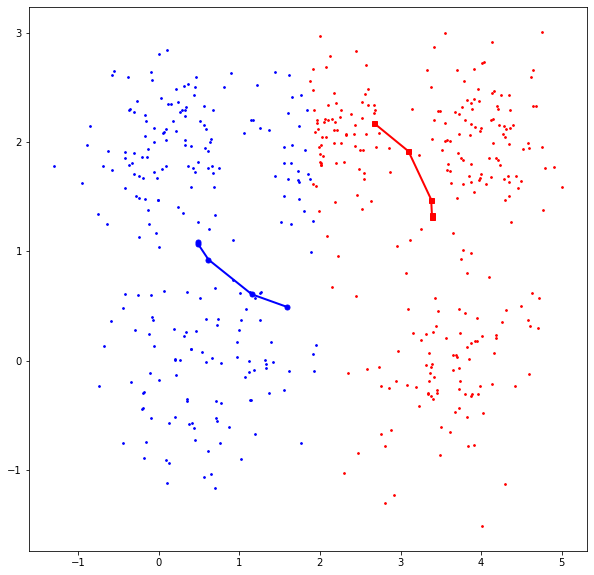

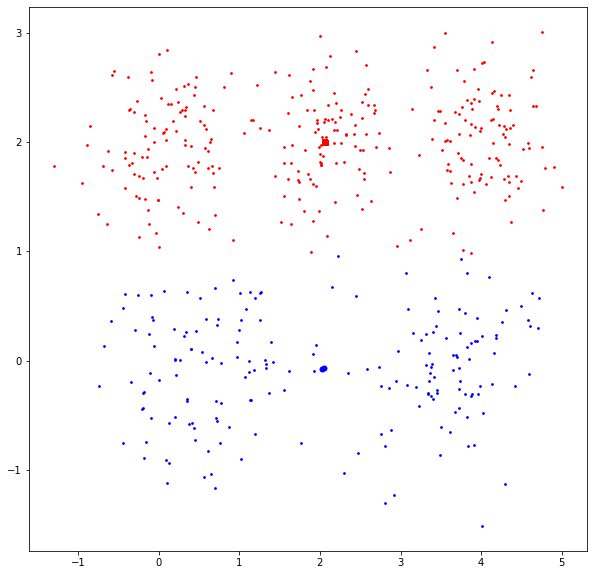

In [14]:
from kmeans import kmeans
from kmeans_plot import kmeans_plot
x = sio.loadmat('kmeans_data.mat')['X']
k = 2  # modify if you want
n_loop = 1000
min_sd, max_sd = np.inf, 0
for i in range(n_loop):
    idx_t, ctrs_t, iter_ctrs_t = kmeans(x, k)
    sd = 0
    for j in range(x.shape[0]):
        sd += np.sum((x[j] - ctrs_t[idx_t[j]]) ** 2)
    if sd < min_sd:
        min_sd = sd
        idx_min, ctrs_min, iter_ctrs_min = idx_t, ctrs_t, iter_ctrs_t
    if sd > max_sd:
        max_sd = sd
        idx_max, ctrs_max, iter_ctrs_max = idx_t, ctrs_t, iter_ctrs_t
print(min_sd, max_sd)
kmeans_plot(x, idx_min, ctrs_min, iter_ctrs_min)
kmeans_plot(x, idx_max, ctrs_max, iter_ctrs_max)

Run your k-means algorithm on the digit dataset `digit_data.mat`. 

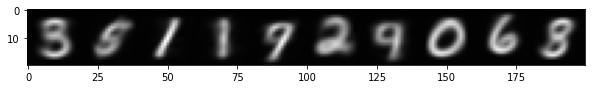

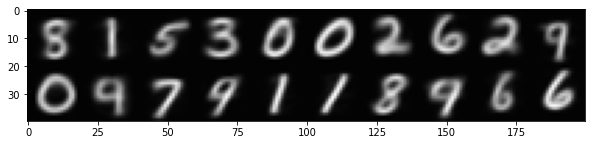

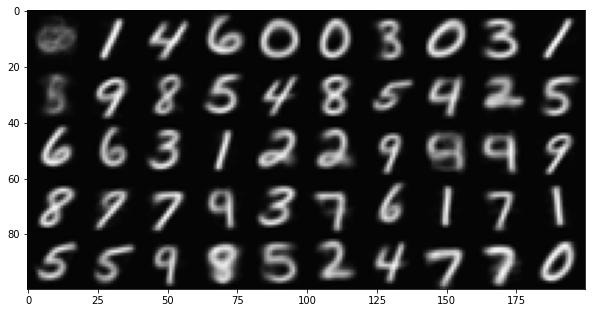

In [15]:
from show_digit import show_digit
x = sio.loadmat('digit_data.mat')['X']
for k in [10, 20, 50]:
    _, ctrs, _ = kmeans(x, k)
    show_digit(ctrs)

# Vector quantization
Compress images with K set to 8, 16, 32 and 64.

(800, 1062, 3) (849600, 3)
k 8
n_iter 31
time 9.36624002456665
k 16
n_iter 73
time 38.842353105545044
k 32
n_iter 62
time 65.8893051147461
k 64
n_iter 97
time 221.97546291351318


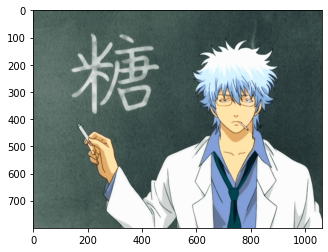

In [1]:
import kmeans
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import numpy as np


img = imread('sample1.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
# YOUR (SEVERAL LINES) CODE HERE
def to_img(idx, ctrs, img_size):
    img = ctrs[idx]
    return img.reshape(img_size).astype(np.uint8)

print(img.shape, fea.shape)
ks = [8, 16, 32, 64]
for i in range(len(ks)):
    print('k', ks[i])
    start = time.time()
    idx, ctrs, it = kmeans.kmeans(fea, ks[i])
    end = time.time()
    print('n_iter', len(it))
    print('time', end-start)

    impressed_img = to_img(idx, ctrs, img.shape)
    # plt.imshow(fea.reshape(img.shape).astype(np.uint8))
    # plt.subplot(2, 2, i+1)
    plt.imshow(impressed_img)
    plt.savefig('results/vq_' + str(ks[i]))